In [30]:
import sys

# go out by one level of directory
sys.path.append("..")

# Introduction

## Problem Statement

# Machine Learning Pipeline

## Step 1: Exploratory Data Analysis

The first step in the pipeline is to perform exploratory data analysis (EDA) to understand the dataset better. This includes checking for missing values, data types, and statistical summaries of the features. Visualizations such as histograms, box plots, and correlation matrices are used to gain insights into the data.

### Project Setup

Before starting the EDA, we need to configure the project by defining the necessary constants and importing the required libraries.

#### File and Directory Paths

The following constants define the file and directory paths used in the project.

In [31]:
# Set global directories
DATA_DIR = "../data"
DATASET_DIR = f"{DATA_DIR}/datasets"

CACHE_DIR = f"{DATA_DIR}/cache"
DATASET_CACHE_DIR = f"{CACHE_DIR}/datasets"

TRAIN_DATA_DIR = f"{DATASET_DIR}/raw"
CLEANED_TRAIN_DATA_DIR = f"{DATASET_DIR}/cleaned"
PROCESSED_TRAIN_DATA_DIR = f"{DATASET_DIR}/processed"

# Set path to cache visualizations and models
VISUALIZATION_DIR = f"{CACHE_DIR}/visualizations"
MODEL_DIR = f"{CACHE_DIR}/models"

#### Reload custom libraries

Some libraries purposely custom-built by me to be used in this notebook. Making modifications to these libraries will require reloading them. The following code block automates the process of reloading the libraries without restarting the kernel.

In [32]:
from utils.cache import reload_custom_libaries

reload_custom_libaries()

# Import necessary packages and libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from PIL import ImageFile
import os, sys
from tqdm.auto import tqdm


# Load personalize utils
from utils.image_process import image_path, img_dupChecks, imgSizeList

# Get a general view of the dataset

In [34]:
data = tf.keras.utils.image_dataset_from_directory(TRAIN_DATA_DIR)

Found 90082 files belonging to 6 classes.


# Extract image paths into different categories base on its type

In [35]:
# extracting paths from each of the category
beds_path = image_path(TRAIN_DATA_DIR, "beds")
chairs_path = image_path(TRAIN_DATA_DIR, "chairs")
dressers_path = image_path(TRAIN_DATA_DIR, "dressers")
lamps_path = image_path(TRAIN_DATA_DIR, "lamps")
sofas_path = image_path(TRAIN_DATA_DIR, "sofas")
tables_path = image_path(TRAIN_DATA_DIR, "tables")

print("Successfully extract all paths!")

Getting path: 100%|██████████| 17/17 [00:00<00:00, 361.69it/s]

Successfully extract all paths!


# EDA

## Get the total amount of images in different categories before checking for duplicants

In [36]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

Amount of bed:  6578
Amount of chair:  22053
Amount of dresser:  7871
Amount of lamp:  32402
Amount of sofa:  4080
Amount of table:  17100
Total:  90084


### Visualization

In [37]:
image_Classes = {
    "Beds": len(beds_path),
    "Chairs": len(chairs_path),
    "Dressers": len(dressers_path),
    "Sofas": len(sofas_path),
    "Lamps": len(lamps_path),
    "Tables": len(tables_path),
}

Text(0, 0.5, 'Amount')

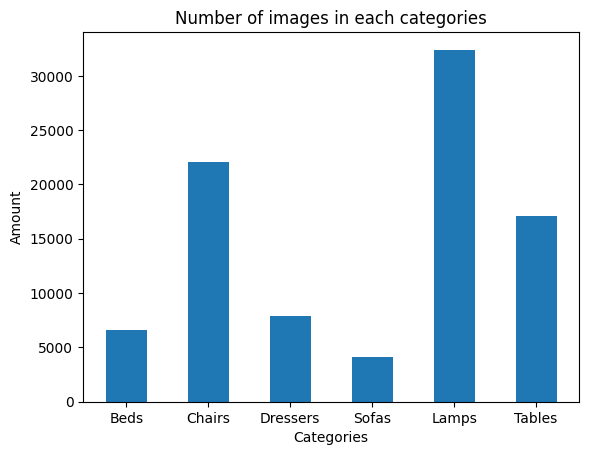

In [38]:
plt.bar(image_Classes.keys(), image_Classes.values(), width=0.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

## Get duplicate images from each categories

### Check duplicants and remove duplicants from each categories

In [39]:
# Get the amount of duplicants and then remove it from the dataset
print("Bed")
img_dupChecks(beds_path)
print("Chair")
img_dupChecks(chairs_path)
print("Dresser")
img_dupChecks(dressers_path)
print("Sofa")
img_dupChecks(sofas_path)

Bed


Finding duplicate images: 100%|██████████| 6578/6578 [00:08<00:00, 742.09it/s]


Number of duplicants:  400
Duplicants has been removed!
Chair


Finding duplicate images: 100%|██████████| 22053/22053 [00:35<00:00, 627.73it/s]


Number of duplicants:  1836
Duplicants has been removed!
Dresser


Finding duplicate images: 100%|██████████| 7871/7871 [00:12<00:00, 637.22it/s]


Number of duplicants:  632
Duplicants has been removed!
Sofa


Finding duplicate images: 100%|██████████| 4080/4080 [00:06<00:00, 669.12it/s]

Number of duplicants:  353
Duplicants has been removed!


In [40]:
print("Lamp")
img_dupChecks(lamps_path)
print("Table")
img_dupChecks(tables_path)

Lamp


Finding duplicate images: 100%|██████████| 32402/32402 [01:02<00:00, 521.93it/s]


Number of duplicants:  6245
Duplicants has been removed!
Table


Finding duplicate images: 100%|██████████| 17100/17100 [00:30<00:00, 563.29it/s]

Number of duplicants:  1049
Duplicants has been removed!


### Recheck the categories after removing duplicants

In [41]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

Amount of bed:  6578
Amount of chair:  22053
Amount of dresser:  7871
Amount of lamp:  32402
Amount of sofa:  4080
Amount of table:  17100
Total:  90084


### Visualization

In [42]:
image_Classes_modified = {
    "Beds": len(beds_path),
    "Chairs": len(chairs_path),
    "Dressers": len(dressers_path),
    "Sofas": len(sofas_path),
    "Lamps": len(lamps_path),
    "Tables": len(tables_path),
}

Text(0, 0.5, 'Amount')

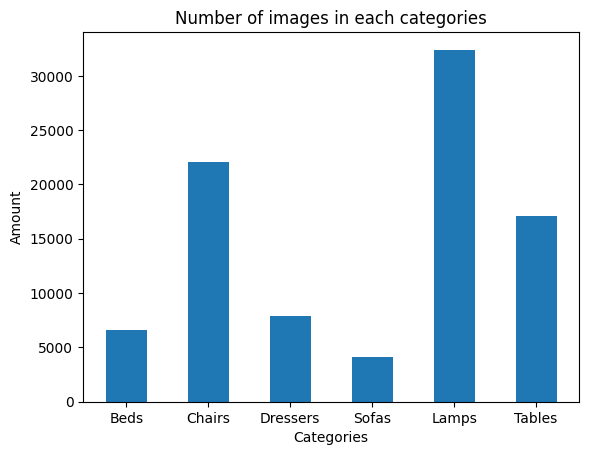

In [43]:
plt.bar(image_Classes_modified.keys(), image_Classes_modified.values(), width=0.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

-   In the plot we can see the differences between of the amount in different columns. Because of that, we will need to check for the imbalances of our dataset

## Get different amount of image size of each category

In [44]:
print("Beds")
df_bed_dims = pd.DataFrame(imgSizeList(beds_path), columns=["width", "height"])
print("Chairs")
df_chair_dims = pd.DataFrame(imgSizeList(chairs_path), columns=["width", "height"])
print("Dressers")
df_dresser_dims = pd.DataFrame(imgSizeList(dressers_path), columns=["width", "height"])
print("Lamps")
df_lamp_dims = pd.DataFrame(imgSizeList(lamps_path), columns=["width", "height"])
print("sofas")
df_sofa_dims = pd.DataFrame(imgSizeList(sofas_path), columns=["width", "height"])
print("Tables")
df_table_dims = pd.DataFrame(imgSizeList(tables_path), columns=["width", "height"])

Beds


Getting image size: 100%|██████████| 6578/6578 [00:02<00:00, 3233.67it/s]


224x224 pixels:  6537
350x350 pixels:  41
Other size:  0
Chairs


Getting image size: 100%|██████████| 22053/22053 [00:07<00:00, 3135.01it/s]


224x224 pixels:  0
350x350 pixels:  22053
Other size:  0
Dressers


Getting image size: 100%|██████████| 7871/7871 [00:02<00:00, 2981.74it/s]


224x224 pixels:  0
350x350 pixels:  7871
Other size:  0
Lamps


Getting image size: 100%|██████████| 32402/32402 [00:11<00:00, 2885.21it/s]


224x224 pixels:  0
350x350 pixels:  32402
Other size:  0
sofas


Getting image size: 100%|██████████| 4080/4080 [00:01<00:00, 2156.03it/s]


224x224 pixels:  0
350x350 pixels:  4080
Other size:  0
Tables


Getting image size: 100%|██████████| 17100/17100 [00:06<00:00, 2714.01it/s]

224x224 pixels:  0
350x350 pixels:  17099
Other size:  1


### Visualization

#### Visualization of each dataset

<Axes: xlabel='width', ylabel='height'>

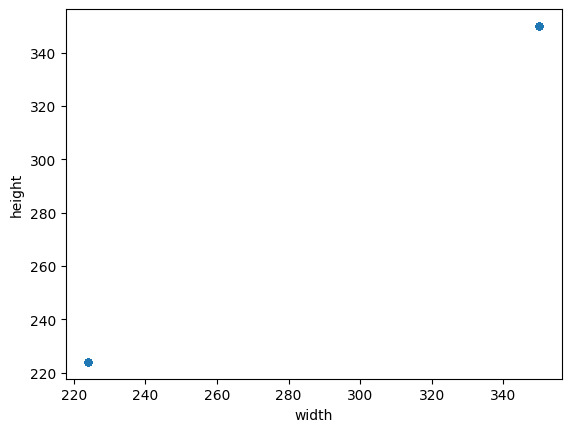

In [45]:
df_bed_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

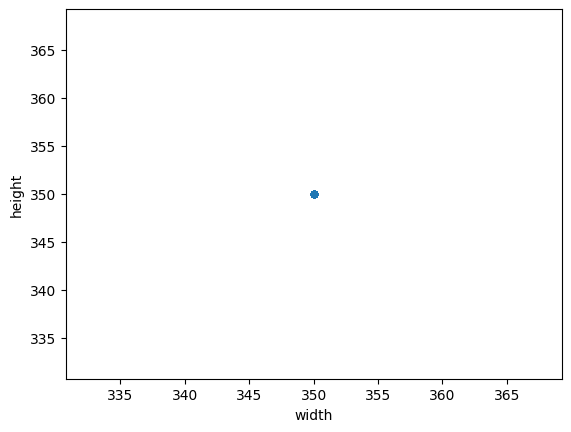

In [46]:
df_chair_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

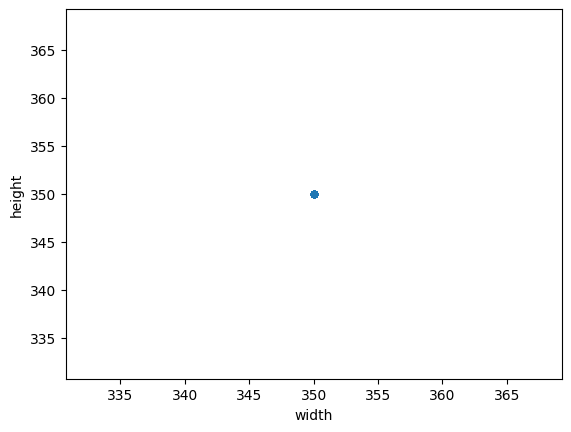

In [47]:
df_dresser_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

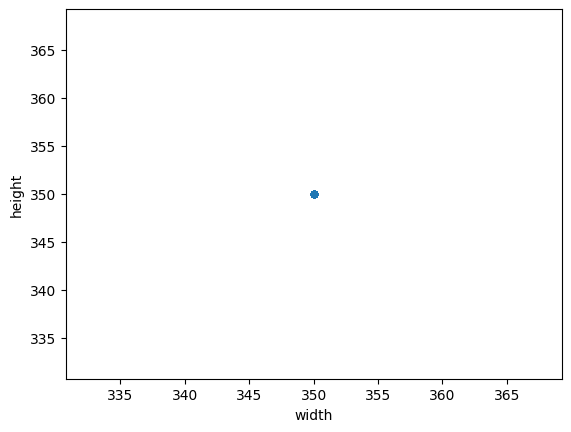

In [48]:
df_lamp_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

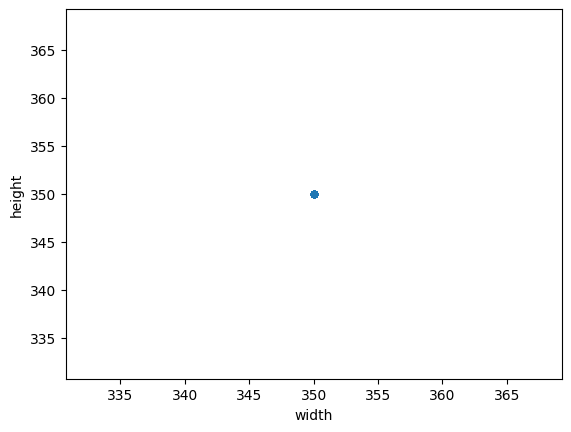

In [49]:
df_sofa_dims.plot.scatter(x="width", y="height")

<Axes: xlabel='width', ylabel='height'>

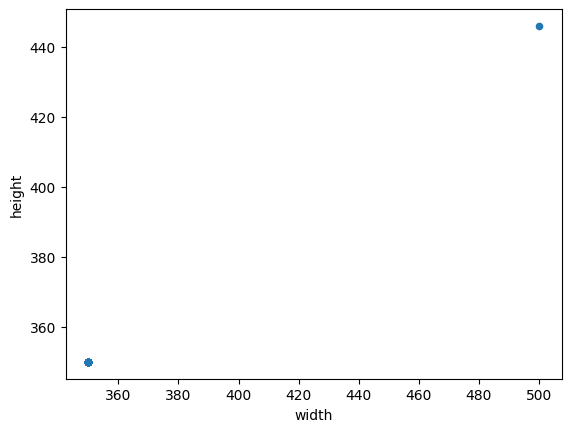

In [50]:
df_table_dims.plot.scatter(x="width", y="height")

Investigate anomaly data in the dataframe

In [51]:
df_table_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,17100.0,350.008772,1.147079,350.0,350.0,350.0,350.0,500.0
height,17100.0,350.005614,0.734130,350.0,350.0,350.0,350.0,446.0


## Conclusion

- The dataset contains 6 categories of items with 90083 items total
- The dataset contains all file with JPEG type
- The dataset contains image mainly in two dimensions: 224x224 and 350x350. However there are one anomaly dimensions in the table category which is: 500x446